# Purchase Incidence Model

- Will a customer buy a product from a particular product category when they enter the shop?

We will answer this question by building a statistical model using Logistic Regression that estimates purchase probability for each customer at each shopping trip. Then we will calculate price elasticity under different conditions. <br>
We choose Logistic Regression because it's rather straitforward and easy to interpret. <br>
It is a classification method that outputs a probability between 0 and 1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

from sklearn.linear_model import LogisticRegression

sns.set()

%matplotlib inline

## Step 1: Importing and Exploring Data

In [2]:
purchase = pd.read_csv("data/purchase_data.csv")

In [3]:
purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [4]:
purchase.shape

(58693, 24)

In [5]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58693 entries, 0 to 58692
Data columns (total 24 columns):
ID                   58693 non-null int64
Day                  58693 non-null int64
Incidence            58693 non-null int64
Brand                58693 non-null int64
Quantity             58693 non-null int64
Last_Inc_Brand       58693 non-null int64
Last_Inc_Quantity    58693 non-null int64
Price_1              58693 non-null float64
Price_2              58693 non-null float64
Price_3              58693 non-null float64
Price_4              58693 non-null float64
Price_5              58693 non-null float64
Promotion_1          58693 non-null int64
Promotion_2          58693 non-null int64
Promotion_3          58693 non-null int64
Promotion_4          58693 non-null int64
Promotion_5          58693 non-null int64
Sex                  58693 non-null int64
Marital status       58693 non-null int64
Age                  58693 non-null int64
Education            58693 non-null int64

In [6]:
# missing data
purchase.isna().sum().sum()

0

Note: there is no missing data and all variables are quantitative.

In [7]:
# number of unique customers
purchase.ID.nunique()

500

## Step 2: Data Segmentation

### Importing Segmentation Model

In [8]:
scaler = pickle.load(open("pickle/scaler.pickle", "rb"))

/Users/kbosko/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator StandardScaler from version 0.21.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [9]:
pca = pickle.load(open("pickle/pca.pickle", "rb"))

/Users/kbosko/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator PCA from version 0.21.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [10]:
kmeans_pca = pickle.load(open("pickle/kmeans_pca.pickle", "rb"))

/Users/kbosko/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator KMeans from version 0.21.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


### Standardization

In [11]:
features = purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]

In [12]:
purchase_scaled = scaler.transform(features)

### PCA

In [13]:
purchase_scaled_pca = pca.transform(purchase_scaled)

### KMeans segmentation

In [14]:
purchase_sc_pca_kmeans = kmeans_pca.predict(purchase_scaled_pca)

In [15]:
purchase_sc_pca_kmeans

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [16]:
purchase_predictors = purchase.copy()

In [17]:
purchase_predictors['Segment'] = purchase_sc_pca_kmeans

In [18]:
purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


In [19]:
segments_dummies = pd.get_dummies(purchase_predictors['Segment'], prefix='Segment', prefix_sep='_');
segments_dummies.head()

,Segment_0,Segment_1,Segment_2,Segment_3
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [20]:
purchase = pd.concat([purchase_predictors, segments_dummies], axis=1)
purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,47,1,110866,1,0,2,0,0,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,2,0,0,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,2,0,0,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,47,1,110866,1,0,2,0,0,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,47,1,110866,1,0,2,0,0,1,0


## Step 3: Purchase Probability Model

In [21]:
# we will predict whether a purchase occurs based on Incidence data
y = purchase['Incidence']

In [22]:
# we want to know whether a purchase has happened based on the average price of a product
X = pd.DataFrame(purchase.iloc[:, 7:12].mean(axis=1))
X.head()

,0
0,2.044
1,2.028
2,2.028
3,2.028
4,2.030


In [23]:
# solver = technique for iteration optimization problem
# sag is optimal for simple problems with large datasets
logreg = LogisticRegression(solver='sag')
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
# let's coefficients for independent variable, here mean price
# decrease in price will increase purchase probability
logreg.coef_

array([[-2.348465]])

### Price Elasticity of Purchase Probability

**Price Elasticity of Purchase Probability** = the % change in purchase probability in response to 1% change in price.

We can try out different price ranges and see how they affect the purchase probability.

In [25]:
purchase.iloc[:, 7:12].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


Note: the minimum price is 1.1 USD and the highest price is 2.8 USD.

In [26]:
# create a price range from 0.5 to 3.5 with a step of 0.01 to indeicate the increase of 1 cent
price_range = np.arange(0.5, 3.5, 0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [27]:
df_price_range = pd.DataFrame(price_range)

In [28]:
# predict the purchase probability for the price range
Y_pr = logreg.predict_proba(df_price_range)
Y_pr[:10]

array([[0.08214313, 0.91785687],
       [0.08393124, 0.91606876],
       [0.08575463, 0.91424537],
       [0.08761385, 0.91238615],
       [0.08950943, 0.91049057],
       [0.09144191, 0.90855809],
       [0.09341183, 0.90658817],
       [0.09541973, 0.90458027],
       [0.09746615, 0.90253385],
       [0.09955164, 0.90044836]])

Note: the output is 2-dimensional array with probabilities for 0 (no-purchase) and 1 (purchase). Since we are interested in purchase probability we can take extract the second column.

In [29]:
purchase_pr = Y_pr[:][:, 1]
purchase_pr[:10]

array([0.91785687, 0.91606876, 0.91424537, 0.91238615, 0.91049057,
       0.90855809, 0.90658817, 0.90458027, 0.90253385, 0.90044836])

How does demand for the product change with the given change in price?

![price_elasticity_full.png](assets/price_elasticity_full.png)

Simplified Elasticity formula:
![price_elasticity_simplified.png](assets/price_elasticity_simplified.png)

In [30]:
price_range.shape, purchase_pr.shape

((300,), (300,))

In [31]:
# beta = coefficient from logreg model
# it is an array of shape (1, number of features). in our case 1 => to access price coeff we need to indicate 0 index
price_elasticity = logreg.coef_[:, 0] * price_range * (1 - purchase_pr)

In [32]:
df_price_elasticity = pd.DataFrame({"Price_Point": pd.Series(price_range), "Mean_PurchaseProb": pd.Series(price_elasticity)})

In [33]:
df_price_elasticity.head(15)

,Price_Point,Mean_PurchaseProb
0,0.50,-0.096455
1,0.51,-0.100526
2,0.52,-0.104724
3,0.53,-0.109052
4,0.54,-0.113513
5,0.55,-0.118111
6,0.56,-0.122850
7,0.57,-0.127731
8,0.58,-0.132760
9,0.59,-0.137938


In [34]:
# if we want to see all rows as the output
#pd.options.display.max_rows = None

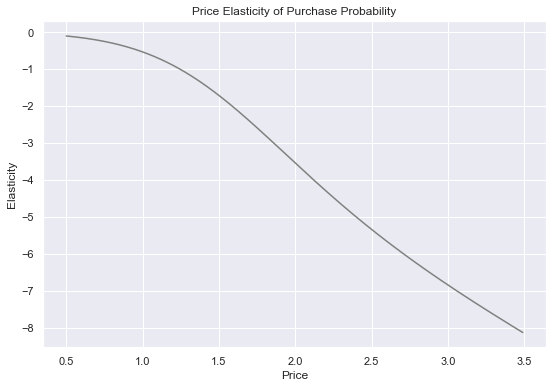

In [35]:
plt.figure(figsize=(9,6))
plt.plot(df_price_elasticity['Price_Point'], df_price_elasticity['Mean_PurchaseProb'], color='grey')
plt.xlabel('Price')
plt.ylabel('Elasticity');
plt.title('Price Elasticity of Purchase Probability');

**Note**: the Price Elasticity decreases as Price increases. The higher the price of a product becomes, the less likely  it is that the people would buy it. The decrease in price is slow in the range 0.5 and 1.25 and then it becomes steeper as price increases. <br>
Price Elasticity is negative, because we used logreg coefficient to populate it. Because we have inverse relationship between price and purchase probability, our price elasticity is also negative. <br>
By definition, Elasticity measures the % change in Purchase Probability given % change in Price.

*Inelastic* is when percent change is greater than 100%, in other words |E| < 1 <br>
*Elastic*: |E| > 1

e.g. at point 1.1 price average customer has elasticity of -0.69. This means that for each increase in price by 1%, the probability of purchase will decrease by 0.69%. |-0.69| < 1, therefore purchase probability at this point is inelastic.

e.g. at point 1.5 price, the elasticity is -1.7. Here, the 1% increase in price will decrease the probability of purchase by 1.7%. In this case, the elasticity of purchase probability is elastic.

**For inelastic values, the general recommendation is to increase the price as it wouldn't cause a significant decrease in purchase probability.**

**On the other hand, when elasticity is greater than 1 in absolute terms, we should decrease our prices.**

- At which price point, the elasticity switches from inelastic to elastic?

In [36]:
df_price_elasticity[abs(df_price_elasticity['Mean_PurchaseProb']) >= 1].head(1)

,Price_Point,Mean_PurchaseProb
75,1.25,-1.005399


**Conclusion**: With prices lower than 1.25 USD, we can increase our product price without loosing too much in terms of purchase probability. With prices higher than 1.25 USD we are more to gain by reducing our prices.

![price_elasticity_interpretation.png](assets/price_elasticity_interpretation.png)

Checking Price Elasticity Understanding:

1) We have a product, which costs $2.40-. We have obtained the price elasticity of purchase probability to be -0.79. <br> The customer at this price point is: Inelastic

2) We have a product, which costs $3.50. We have obtained the price elasticity of purchase probability to be -2.1. <br>The customer at this point is: Elastic


3) We have a product, which costs $2.00. Using a logistic regression model, we have obtained the coefficient for price to be -2.3. In addition, we have estimated the purchase probability at this price point to be 0.3. Using the price elasticity formula from the lecture, what is the price elasticity?

E = beta * price * (1-pr(Purchase) =  -2.3*2*(1-0.3) = -3.22 

4) A company has a product with a price of 2.3 dollars on the market. They have estimated that the price elasticity of purchase probability at this price point is -0.9. If you are an adviser for the marketing team of the company what would you recommend: <br>
The company should increase its product price, without fear of losing too many customers.

5) The purchase probability of a client at a price point is 0.7, while their price elasticity: -1.56. If we raise the price of the product by 1 pct, the new probability of purchase of the client will be: 68.44 pct.

6) The purchase probability of a client at 2.56 USD is 0.7, while their price elasticity: -1.22. If we lower the price of the product by $0.02, the new probability of purchase of the client will be: 70.95 pct

decrease by 1%, new prob = 0.7+0.0122 = 0.7122
2.54/2.56 * (0.7+0.0122) = 70.66

## Purchase Elasticities for Different Segments

In the previous section, we modeled the Price Elasticity for Average Customer. Let's refine our analysis to model Price Elastictiy by Segments.

In [37]:
def calculate_mean_price_elasticity(df, price_range):
    '''
    Input:
        df: dataframe with predictors
        price_range: array of prices for which we want to calculate price elasticity, e.g. np.arange(0.5, 3.5, 0.01)
    Output: 
        mean_price_elasticity: price elasticity for average customer
    '''
    y = df['Incidence']
    X = pd.DataFrame(df.iloc[:, 7:12].mean(axis=1))
    
    logreg = LogisticRegression(solver='sag')
    logreg.fit(X, y)
    
    df_price_range = pd.DataFrame(price_range)
    
    Y_pr = logreg.predict_proba(df_price_range)
    
    #probability of purchase
    purchase_pr = Y_pr[:][:, 1]
    beta = logreg.coef_[:, 0]
    mean_price_elasticity = beta * price_range * (1 - purchase_pr)

    return mean_price_elasticity

In [38]:
def calculate_price_elasticity_by_segment(df, segment_num, price_range):
    '''
    Input:
        df: dataframe with predictors
        segment_num: number of segment to predict, here 0,1,2,3
        price_range: array of prices for which we want to calculate price elasticity, e.g. np.arange(0.5, 3.5, 0.01)
    Output: 
        purchase_pr: predicted probability of purchase depending on price using LogisticRegression
        beta: coefficient of Logistic Regression model
    '''
    
    segment = df[df['Segment'] == segment_num]
    y = segment['Incidence']
    X = pd.DataFrame(segment.iloc[:, 7:12].mean(axis=1))
    
    logreg = LogisticRegression(solver='sag')
    logreg.fit(X, y)
    
    df_price_range = pd.DataFrame(price_range)
    
    Y_pr = logreg.predict_proba(df_price_range)
    
    #probability of purchase
    purchase_pr = Y_pr[:][:, 1]
    beta = logreg.coef_[:, 0]
    
    price_elasticity = beta * price_range * (1 - purchase_pr)

    return price_elasticity

In [89]:
def create_price_elasticties_by_segment_df(df, num_segments, price_range):
    '''
    Input:
        df: dataframe with predictors, here purchase
        num_segments: total number of segments, here range(4)
        price_range: array of prices for which we want to calculate price elasticity, e.g. np.arange(0.5, 3.5, 0.01)
    Output:
        dict_elastic: dictionary with segments as keys and elastic tipping point as values
        df_price_elasticity: dataframe with price elasticities for average customer and each segment
        
    '''    
    df_price_elasticity = pd.DataFrame({"Price_Point": pd.Series(price_range)})
    df_price_elasticity['Mean_PE'] = calculate_mean_price_elasticity(df, price_range)
    
    mean_elastic_price = df_price_elasticity[abs(df_price_elasticity['Mean_PE']) >= 1]['Price_Point'].min()
    dict_elastic = {'mean': np.round(mean_elastic_price, 2)}
    
    for i in num_segments:
        price_elasticity = calculate_price_elasticity_by_segment(df, i, price_range)
        df_price_elasticity['Segment_'+str(i)] = pd.Series(price_elasticity)
        min_elastic_price = df_price_elasticity[abs(df_price_elasticity['Segment_'+str(i)]) >= 1]['Price_Point'].min()
        dict_elastic.update({i: np.round(min_elastic_price, 2)})
                    
    return dict_elastic, df_price_elasticity

In [90]:
dict_elastic, df_price_elasticity = create_price_elasticties_by_segment_df(purchase, range(4), np.arange(0.5, 3.5, 0.01))

In [91]:
# prices for each segment above which they become elastic
dict_elastic

{'mean': 1.25, 0: 1.23, 1: 1.39, 2: 1.27, 3: 1.46}

In [92]:
df_price_elasticity.head()

,Price_Point,Mean_PE,Segment_0,Segment_1,Segment_2,Segment_3
0,0.50,-0.096351,-0.211176,-0.119089,-0.030933,-0.168092
1,0.51,-0.100417,-0.217746,-0.123272,-0.032701,-0.173019
2,0.52,-0.104611,-0.224424,-0.127548,-0.034555,-0.178016
3,0.53,-0.108934,-0.231210,-0.131919,-0.036500,-0.183085
4,0.54,-0.113391,-0.238106,-0.136386,-0.038541,-0.188224


In [93]:
def plot_price_elasticities_by_segment(df, num_segments, price_range):
    '''
    Input:
        df: dataframe with predictors, here purchase
        num_segments: total number of segments, here range(4)
        price_range: array of prices for which we want to calculate price elasticity, e.g. np.arange(0.5, 3.5, 0.01)
    Output:
        none
    '''
    
    _, df_price_elasticity = create_price_elasticties_by_segment_df(df, num_segments, price_range)

    plt.figure(figsize=(9,6))
    plt.xlabel('Price')
    plt.ylabel('Elasticity');
    plt.title('Price Elasticity of Purchase Probability by Segments');
    plt.plot(df_price_elasticity['Price_Point'], 
             df_price_elasticity['Mean_PE'], 
             color='grey',
             label='Average Customer')

    
    dict_colors = {0: 'b', 1: 'g', 2: 'r', 3: 'orange'}
    dict_segments = {0: 'Standard', 1: 'Career-Focused', 2: 'Fewer Opportunities', 3: 'Well-Off'}

    for i in num_segments:
        plt.plot(df_price_elasticity['Price_Point'], 
                 df_price_elasticity['Segment_'+str(i)], 
                 color=dict_colors[i],
                 label=dict_segments[i])
        plt.legend(loc="lower left")

        # if we want to plot vertical line for each segment's price when it becomes elastic
        #plt.axvline(dict_elastic[i], color=dict_colors[i])

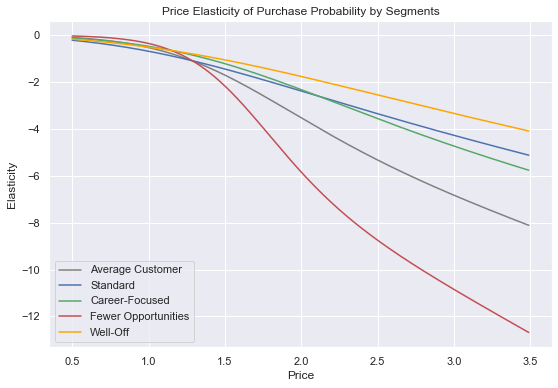

In [94]:
plot_price_elasticities_by_segment(purchase, range(4), np.arange(0.5, 3.5, 0.01));

**Conclusion**: Fewer Opportunities segment is the most price sensitive compared to other segments. This segment has very steep decrease, meaning that with increase in price, they become more and more elastic much faster. The tipping point between elasticity and inelasticity for Fewer Opportunities segment is 1.27 USD.

## Purchase Probability with/without Promotion 

Let's explore the overall effect of promotion activities on elasticties.

### Case 1: promotional activities for all brands

In [98]:
y = purchase['Incidence']
X = pd.DataFrame(purchase.iloc[:, 7:12].mean(axis=1))
X.columns = ['Mean_Price']
X['Mean_Promotion'] = pd.DataFrame(purchase.iloc[:, 12:17].mean(axis=1))

# Model Fitting
logreg = LogisticRegression(solver='sag')
logreg.fit(X, y)

df_price_elasticity_promotion = pd.DataFrame(price_range)
df_price_elasticity_promotion['Promotion'] = 1

Y_promo = logreg.predict_proba(df_price_elasticity_promotion)

#probability of purchase
purchase_wpromo_prob = Y_promo[:][:, 1]
beta = logreg.coef_[:, 0]
mean_price_elasticity_promo = beta * price_range * (1 - purchase_wpromo_prob)

df_price_elasticity['Promo'] = mean_price_elasticity_promo
df_price_elasticity.head()

,Price_Point,Mean_PE,Segment_0,Segment_1,Segment_2,Segment_3,Promo
0,0.50,-0.096351,-0.211176,-0.119089,-0.030933,-0.168092,-0.125724
1,0.51,-0.100417,-0.217746,-0.123272,-0.032701,-0.173019,-0.129840
2,0.52,-0.104611,-0.224424,-0.127548,-0.034555,-0.178016,-0.134034
3,0.53,-0.108934,-0.231210,-0.131919,-0.036500,-0.183085,-0.138309
4,0.54,-0.113391,-0.238106,-0.136386,-0.038541,-0.188224,-0.142665


### Case 2: no promotional activities at all

In [103]:
y = purchase['Incidence']
X = pd.DataFrame(purchase.iloc[:, 7:12].mean(axis=1))
X.columns = ['Mean_Price']
X['Mean_Promotion'] = pd.DataFrame(purchase.iloc[:, 12:17].mean(axis=1))

# Model Fitting
logreg = LogisticRegression(solver='sag')
logreg.fit(X, y)

df_price_elasticity_promotion = pd.DataFrame(price_range)
df_price_elasticity_promotion['Promotion'] = 0

Y_promo = logreg.predict_proba(df_price_elasticity_promotion)

#probability of purchase
purchase_nopromo_prob = Y_promo[:][:, 1]
beta = logreg.coef_[:, 0]
mean_price_elasticity_nopromo = beta * price_range * (1 - purchase_nopromo_prob)

df_price_elasticity['No_Promo'] = mean_price_elasticity_nopromo
df_price_elasticity.head()

,Price_Point,Mean_PE,Segment_0,Segment_1,Segment_2,Segment_3,Promo,No_Promo
0,0.50,-0.096351,-0.211176,-0.119089,-0.030933,-0.168092,-0.125724,-0.195664
1,0.51,-0.100417,-0.217746,-0.123272,-0.032701,-0.173019,-0.129840,-0.201786
2,0.52,-0.104611,-0.224424,-0.127548,-0.034555,-0.178016,-0.134034,-0.208011
3,0.53,-0.108934,-0.231210,-0.131919,-0.036500,-0.183085,-0.138309,-0.214338
4,0.54,-0.113391,-0.238106,-0.136386,-0.038541,-0.188224,-0.142665,-0.220770


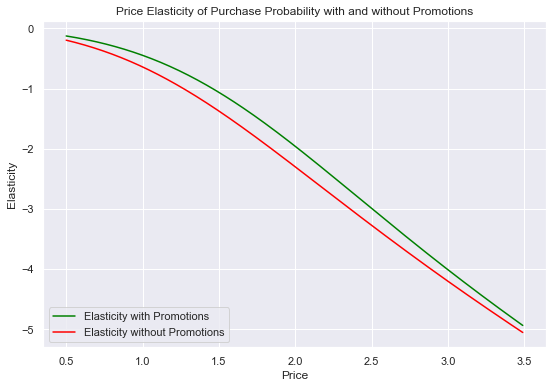

In [109]:
plt.figure(figsize=(9,6))
plt.xlabel('Price')
plt.ylabel('Elasticity');
plt.title('Price Elasticity of Purchase Probability with and without Promotions');
plt.plot(df_price_elasticity['Price_Point'], 
         df_price_elasticity['Promo'], 
         color='green',
         label='Elasticity with Promotions')
plt.plot(df_price_elasticity['Price_Point'], 
         df_price_elasticity['No_Promo'], 
         color='red',
         label='Elasticity without Promotions')
plt.legend(loc="lower left");

**Conclusion**: the graph represents elasticity given maximum and minimum promotional activities.

If the product has a regular price of 1.30 USD (i.e. without promotion), its purchase probability is elastic.
However, if the product costs 1.50 USD and its price is reduced to 1.30 USD during promotion, then our analysis says that the purchase probability is still inelastic at this price point.

Customers are less price sensitive to price changes when there are promotional activities.

**Actionable insights**:
It would be more beneficial to have a higher original price and constant promotion rather than a lower original price.

In [114]:
elastic_price_promo = df_price_elasticity[abs(df_price_elasticity['Promo']) >= 1]['Price_Point'].min()
elastic_price_nopromo = df_price_elasticity[abs(df_price_elasticity['No_Promo']) >= 1]['Price_Point'].min()

print(f"tipping point for price elasticity with promotion: {np.round(elastic_price_promo, 2)} USD")
print(f"tipping point for price elasticity without promotion: {np.round(elastic_price_nopromo, 2)} USD")

tipping point for price elasticity with promotion: 1.46 USD
tipping point for price elasticity without promotion: 1.27 USD


## Acknowledgement:

This project is part of "Customer Analytics" course by [365DataScience](https://365datascience.com)

However, I modified and streamlined some code, e.g. writing functions to automatically calculate and plot price elasticities.